# SyriaTel Customer Churn Prediction Project 

## Business Understanding 


**Business Problem**:  Reducing the rate of customer churn for SyriaTel Telecom  
**Background**:  SyriaTel, a major player in the telecommunications industry, is dealing with a serious problem of customer churn, which occurs when customers cancel their subscriptions, leading to a loss of revenue. To tackle this challenge, SyriaTel plans to develop a predictive model to identify customers who are at risk of churning. By reaching out to these customers with targeted retention strategies, SyriaTel aims to decrease churn rates and keep valuable customers.  
**Problem statement**: Can we predict customer churn for SyriaTel and determine the main factors contributing to it, allowing the company to develop effective retention strategies.

### Objectives:  
 - Develop a Churn Prediction model capable of accurately identifying customers likely to churn using the available dataset.
 - Discover the key patterns and features that contribute to predicting customer churn.  
 
This initiative supports SyriaTel's objective of retaining customers and minimizing revenue loss from churn, highlighting the value of data-driven decision-making in the telecommunications sector.

### Expected Outcome  
The main metric for evaluating the classification model's performance is 'recall,' which measures how well the model identifies customers likely to churn. The goal is to minimize false negatives since missing a potential churner is more costly for the business than incorrectly predicting a non-churner. The target is to achieve at least 80% recall.

However, a balance is necessary. Predicting that all customers will churn would result in perfect recall but offer no real business value, as not all customers are at risk. Therefore, in addition to recall, 'precision' and 'accuracy' will be used as secondary metrics to ensure a comprehensive assessment of the model's performance.

## Import the libraries  
Here, we import the various necessary libraries that we will be using in this project. They include Pandas, Numpy, visualization libraries like matplotlib and seaborn, various scikit-learn modules for machine learning and metrics we will use for evaluating our models.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

## Data Understanding  

In the data folder is a "telcom_data.csv" file, a dataset from SyriaTel Telcom, that contains data about various customers, and whether they churned or not.  

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# Loading the dataset
df = pd.read_csv('data/telcom_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Checking last 4 records
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above preview of the dataset, we can see that the dataset is uniform.

In [9]:
# Checking the shape of the dataset
df.shape

(3333, 21)

In [3]:
# Overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above, we can see that the columns are of different types: float, int, object and bool.  
However, most of the columns have some whitespace in between their names, and it would be better to rename them in such a way that they have an underscore instead of the whitespace.

##### Renaming the by replacing the whitespace with an underscore and displaying unique values

In [13]:
df.columns = df.columns.str.replace(' ', '_')

# Display unique values for each column
for column in df.columns:
    print(f"There are {df[column].nunique()} Unique values in '{column}':")
    print(df[column].unique())
    print('-' * 50)

There are 51 Unique values in 'state':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
--------------------------------------------------
There are 212 Unique values in 'account_length':
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154 

#### Columns description  


- **state** : Different states of the customers  

- **account_length**: It denotes the number of days or duration for which the customer has held their SyriaTel account.

- **area_state**: This column represents the state or location of the customer within the service area of SyriaTel.

- **area_code**: This column typically specifies the area code associated with the customer's phone number.

- **phone_number**: It contains the unique phone number of each customer, serving as an identifier.

- **voice_mail_plan**: Similar to the international plan, this binary column denotes whether the customer has subscribed to a voicemail plan.

- **number_vmail_messages**: If a voice mail plan is active, this column may represent the number of voicemail messages received by the customer.

- **total_day_minutes**: This column records the total number of minutes the customer used during the daytime.

- **total_day_calls**: It indicates the total number of calls made by the customer during the daytime.

- **total_day_charge**: This is the total charge incurred for daytime usage.

- **total_evening_minutes**: Similar to the daytime minutes, this column represents the total number of minutes used in the evening.

- **total_evening_calls**: It denotes the total number of calls made in the evening.

- **total_evening_charge**: This is the total charge for evening usage.

- **total_night_minutes**: Represents the total number of minutes used during the nighttime.

- **total_night_calls**: Denotes the total number of calls made during the nighttime.

- **total_night_charge**: This column reflects the total charge for nighttime usage.

- **total_intl_minutes**: It records the total number of international minutes used by the customer.

- **total_intl_calls**: Indicates the total number of international calls made.

- **total_intl_charge**: Represents the total charge incurred for international usage.

- **customer_service_calls**: This column contains the count of customer service calls made by the customer, possibly indicating issues or concerns.

- **churn**: A boolean column that serves as the target variable, indicating whether the customer churned (True) or did not churn (False), where "churn" means the customer terminated their subscription with SyriaTel.  

These columns provide essential information about the customer's demographics, usage patterns, and telecommunications-related activities. Analyzing these features can help in understanding customer behavior and predicting churn.  
It is important to note that we will need to change the "churn" column into an integer type (binary) before the modeling part.

## Data Cleaning and preparation  

##### Checking for null values

In [14]:
# Check for nullvalues using the isna function
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

##### Checking for duplicate records

In [15]:
# Check for any duplicates
df.duplicated().sum()

0

Since for our dataset, the unique identifier is the `phone_number`, we need to check for any duplicate values in that column.

In [16]:
# Checking for duplicate in phone number
duplicates_numbers = df.duplicated(subset ='phone_number')
duplicates_numbers.unique()

array([False])

For our dataset, we can therefore see that we do not have any duplicate records.

##### Checking and converting data types

In [18]:
# Checking data types of categorical variables
categorical_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
categorical_columns_data_types = df[categorical_columns].dtypes
print(categorical_columns_data_types)

state                 object
area_code              int64
international_plan    object
voice_mail_plan       object
dtype: object


As we can see, the `area_code` column is of type **int** but there are only 3 unique values. Hence it will be better to change it into a categorical type.

In [19]:
# Convert "area_code" column to categorical data type
df["area_code"] = df["area_code"].astype("str")
print(df["area_code"].dtype)

object


In [ ]:
# Converting categorical columns to type 'category' instead of 'object', for memory efficiency
#df[categorical_columns] = df[categorical_columns].astype("category")

In [20]:
# Convert churn column from boolean to integer
df["churn"] = df["churn"].astype(int)
print(df["churn"].dtype)

int32


##### Feature Engineering

In [21]:
# Creating new features; total_charge, total_talk_time, total_calls and avg_call_duration per customer
df["total_charge"] = df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)
df["total_talk_time"] = df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)
df["total_calls"] = df[['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']].sum(axis=1)
df["avg_call_duration"]= df["total_talk_time"] / df["total_calls"]

Creating a day to night ratio per customer column:  

In [22]:
# Creating day to night ratio per customer column
df["day_night_ratio"] = df["total_day_calls"] / df["total_night_calls"]
print(df["day_night_ratio"].describe())

count    3333.000000
mean        1.047618
std         0.323065
min         0.000000
25%         0.826923
50%         1.000000
75%         1.216867
max         3.939394
Name: day_night_ratio, dtype: float64


We can observe from the above, that on average, there are slightly more calls during the day than during the night.

In [23]:
# Creating a voice message to call ratio for each customer
df["voice_ms_call_ratio"] = df["number_vmail_messages"]/ df["total_calls"]
df["voice_ms_call_ratio"].describe()

count    3333.000000
mean        0.026910
std         0.045928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.062670
max         0.188525
Name: voice_ms_call_ratio, dtype: float64

We can see that on average, a very small proportion of calls results in voicemail messages (0.0269)

In [25]:
# Creating columns for charges per call for night, day, evening and international calls per customer
df["charge_per_call_night"] = df["total_night_charge"] / df["total_night_minutes"]
df["charge_per_call_day"] = df["total_day_charge"] / df["total_day_minutes"]
df["charge_per_call_eve"]= df["total_eve_charge"] / df["total_eve_minutes"]
df["charge_per_call_intl"] = df["total_intl_charge"] / df["total_intl_minutes"]

In [26]:
# Summary statistics for the different charges per call
summary_stats = df[["charge_per_call_night", "charge_per_call_day", "charge_per_call_eve", "charge_per_call_intl"]].describe()
summary_stats

,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333.000000,3331.000000,3332.000000,3315.000000
mean,0.045000,0.170003,0.085001,0.270057
std,0.000017,0.000028,0.000016,0.000329
min,0.044828,0.169231,0.084936,0.268182
25%,0.044988,0.169989,0.084988,0.269811
50%,0.045000,0.170004,0.085000,0.270000
75%,0.045013,0.170017,0.085013,0.270297
max,0.045111,0.170513,0.085075,0.272727


* The average charges per call for **nighttime calls** is approximately 4.5 cents per minute
* The average charges per call for **daytime calls** is approximately 17 cents per minute
* The average charges per call for **evening calls** is approximately 8.5 cents per minute
* The average charges per call for **international calls** is approximately 27 cents per minute

##### Checking for outliers

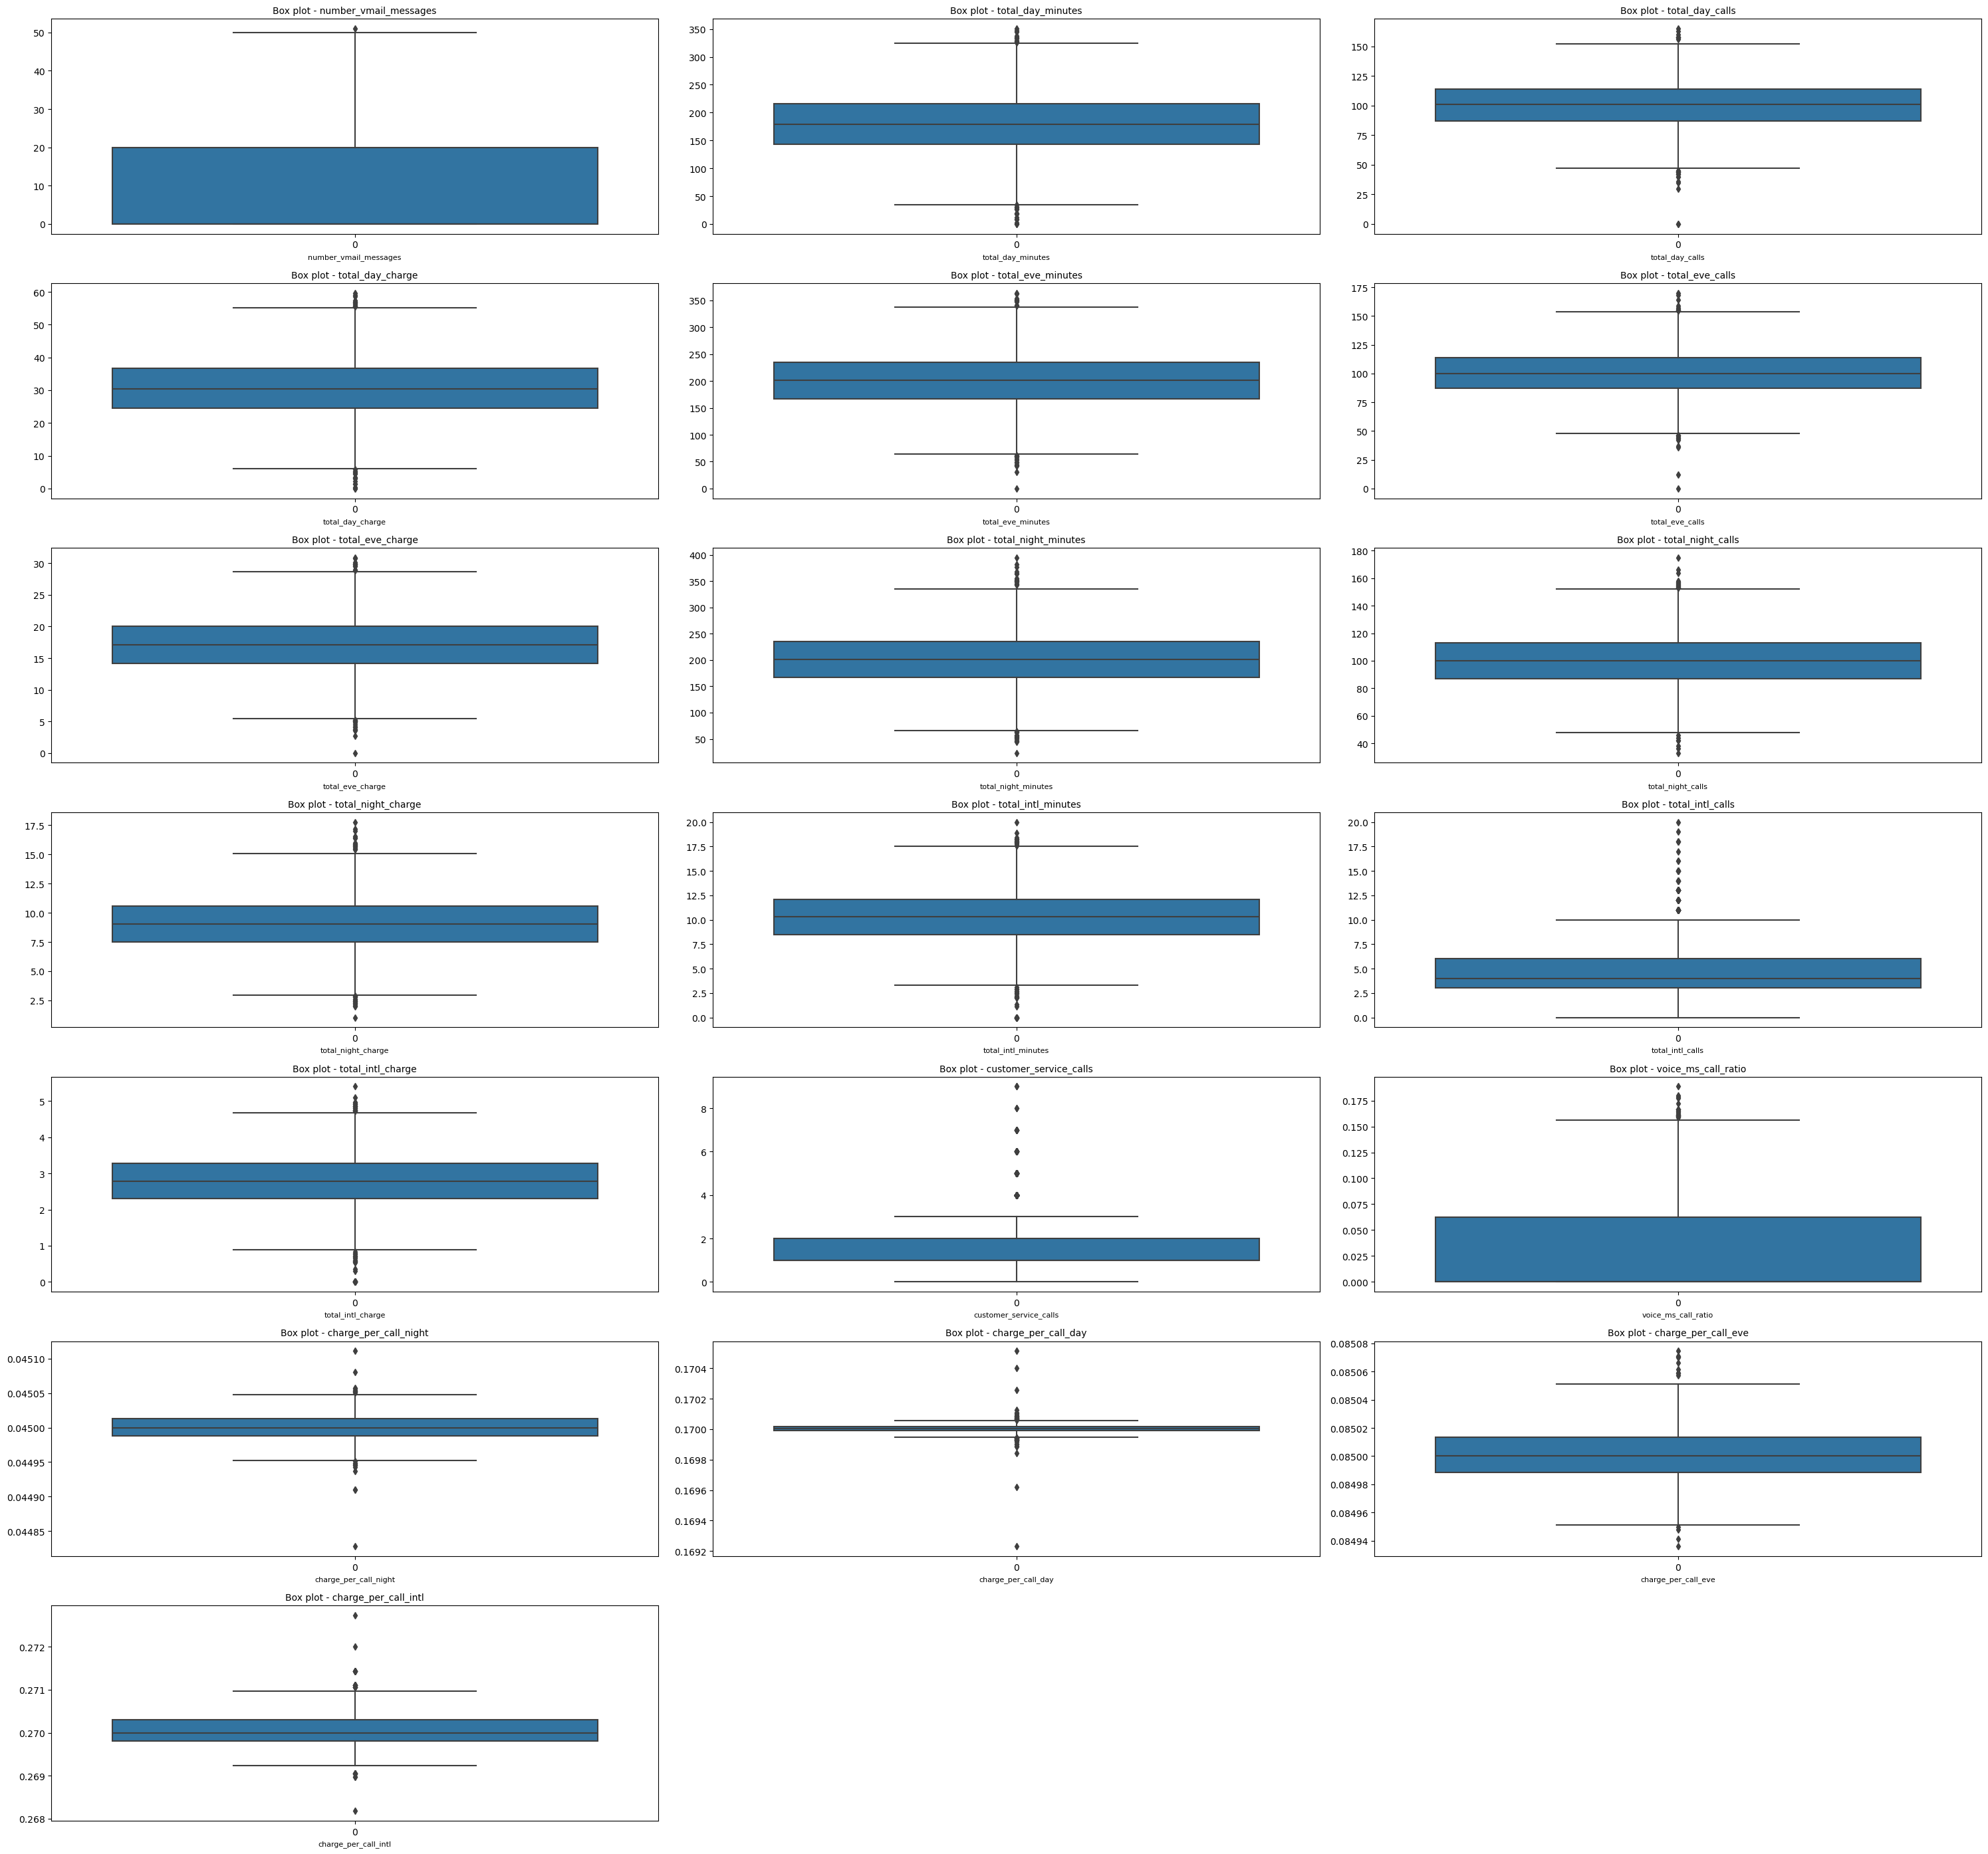

In [27]:
# Columns for our box plots
columns = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
           'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
           'total_night_minutes', 'total_night_calls', 'total_night_charge',
           'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
           'customer_service_calls', 'voice_ms_call_ratio','charge_per_call_night', 
           'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl']

# Calculate the required number of rows and columns for subplots
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each column
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot - {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Observation:  
Several variables show outliers, with some variables having more extreme outliers than others.  
Since we will mostly be using tree-based models like Decision Trees, Random Forests, which are very robust to outliers, there is no need to remove the outliers, and we can keep them.

### Checking if average total charges differ significantly between those who churned and those who didn't

We want to see if the average total charges differ significantly between customers who churned and those who didn’t.  
For this, a suitable statistical test would be the two-sample T-test.  
However, the two-sample T-test has the following assumptions:  
- Normality of the two groups (can be checked with the Shapiro-Wilk test).
- Equal variance between the groups (can be checked with Levene’s test).

We will start by performing the Shapiro-Wilk test and the Levene's test, to see whether the assumptions hold.

###### Shapiro-Wilk Test for Normality

**Hypotheses**  
- Null Hypothesis (H₀): The data follows a normal distribution.
- Alternative Hypothesis (H₁): The data does not follow a normal distribution.  

Interpreting the Results(We use an alpha value of 0.05):   
If p-value > 0.05 → Fail to reject H₀
  → The data is normally distributed.  
  
If p-value ≤ 0.05 → Reject H₀

  → The data is not normally distributed.  
Why is this important?
If normality holds, we can proceed with the Two-Sample T-Test. If not, we should consider a non-parametric alternative like the Mann-Whitney U Test.

###### Levene’s Test for Equal Variance

**Hypotheses**
- Null Hypothesis (H₀): The variances of both groups are equal.
- Alternative Hypothesis (H₁): The variances of both groups are not equal.  

Interpreting the Results:    

If p-value > 0.05 → Fail to reject H₀
  → Variances are equal.  
If p-value ≤ 0.05 → Reject H₀
  → Variances are not equal.

Checking those assumptions:

In [29]:
# Separate data into churned and non-churned groups
churned = df[df["churn"] == 1]["total_charge"]
not_churned = df[df["churn"] == 0]["total_charge"]

# 1. Normality test (Shapiro-Wilk)
shapiro_churned = stats.shapiro(churned)
shapiro_not_churned = stats.shapiro(not_churned)

print("Shapiro-Wilk Test for Normality:")
print(f"Churned: W = {shapiro_churned.statistic}, p = {shapiro_churned.pvalue}")
print(f"Not Churned: W = {shapiro_not_churned.statistic}, p = {shapiro_not_churned.pvalue}")

# 2. Variance test (Levene's test)
levene_test = stats.levene(churned, not_churned)
print("\nLevene's Test for Equal Variance:")
print(f"Statistic = {levene_test.statistic}, p = {levene_test.pvalue}")


Shapiro-Wilk Test for Normality:
Churned: W = 0.9990071654319763, p = 0.995279848575592
Not Churned: W = 0.9964218735694885, p = 0.34402996301651

Levene's Test for Equal Variance:
Statistic = 0.9537197920590084, p = 0.3290109161928567


###### **Results interpretation**  
From the above results:  

**Shapiro-Wilk Normality Test**:  
The p-values for both churned (0.995) and not churned (0.344) groups are greater than 0.05, meaning we fail to reject the null hypothesis of normality. So, both groups are approximately normally distributed.  

**Levene’s Test for Equal Variance**:  
The p-value (0.329) is greater than 0.05, meaning we fail to reject the null hypothesis of equal variance. So, we can assume equal variance between the groups.  
Since both assumptions hold, we can proceed with a Two-Sample (Independent) T-Test using the pooled variance assumption.

##### Performing the two-sample T-test  

**Hypothesis:**  
- Null Hypothesis (H₀): The mean total charge for churned and non-churned customers is the same, i.e. no significant difference.
- Alternative Hypothesis (H₁): The mean total charge for churned customers is different from non-churned customers.  

Since we’re testing for a difference (not specifically greater or lesser), this is a two-tailed test.  
We will also be using an alpha value of 0.05.

Performing the test:

In [30]:
# Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=True)

print("Two-Sample T-Test Results:")
print(f"T-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

Two-Sample T-Test Results:
T-statistic = -0.1860, p-value = 0.8525


**Interpreting the results:**   

T-statistic = -0.1860: This small absolute value suggests that the difference in means is minimal.  
p-value = 0.8525: Since this is much greater than 0.05, we fail to reject the null hypothesis.  

Conclusion:  
There is no significant difference in total charges between churned and non-churned customers. This means that total charge may not be a strong predictor of churn in this dataset.

#### Testing whether "international_plan" is associated with churn  
We can perform a chi square test for independence to test this.  
We'll first check the assumption that each expected frequency should be at least 5 for the test to be valid.  
If that assumption holds, then we'll perform the chi square test.  
We'll again be using an alpha value of 0.05.

**Hypothesis:**  
Null Hypothesis (H₀): There is no association between having an international plan and churn (they are independent).  

Alternative Hypothesis (H₁): There is an association between having an international plan and churn (they are dependent).

In [33]:
# Creating a contingency table
contingency_table = pd.crosstab(df["international_plan"], df["churn"])
print(contingency_table)

# Checking expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Expected Frequencies:\n", expected)

churn                 0    1
international_plan          
no                  255  250
yes                 235  260
Expected Frequencies:
 [[247.45 257.55]
 [242.55 252.45]]


In [34]:
# Performing the Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 0.7956
P-value: 0.3724


From the above, we can see that the P-value is well above the alpha value of 0.05.  
Hence, we fail to reject the null hypothesis